# Data Preparation for Phishing Website Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Set seed
import random
random.seed(2024)

### Read the dataset

In [3]:
# Drop index
import pandas as pd
dataframe = pd.read_csv("phishing2.csv",index_col=0)

In [4]:
dataframe.head()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
Index,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1


### Rearranging categories

In [5]:
# In the original dataset, for class column, -1 is legitimate, 1 is phishing
# For the variables, 1 is legitimate, 0 is suspicious, -1 is phishing

# Changing the class variables to 0 is legitimate, 1 is phishing
dataframe["class"] = dataframe["class"].replace(-1,0)

#For the variables, change 0 is legitmate, 1 is phishing, 2 is suspicious 
col = dataframe.drop(columns="class").columns
dataframe[col] = dataframe[col].replace(0, 2) 
dataframe[col] = dataframe[col].replace(1, 0) 
dataframe[col] = dataframe[col].replace(-1, 1)

In [6]:
dataframe.head()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
Index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,1,2,0,1,0,...,0,0,1,1,2,1,0,0,0,0
1,0,2,0,0,0,1,1,1,1,0,...,0,0,0,1,0,1,0,2,1,0
2,0,2,0,0,0,1,1,1,0,0,...,0,0,1,1,0,1,0,1,0,0
3,0,2,1,0,0,1,0,0,1,0,...,1,0,1,1,2,1,0,0,0,1
4,1,2,1,0,1,1,0,0,1,0,...,0,0,0,0,0,1,0,1,1,1


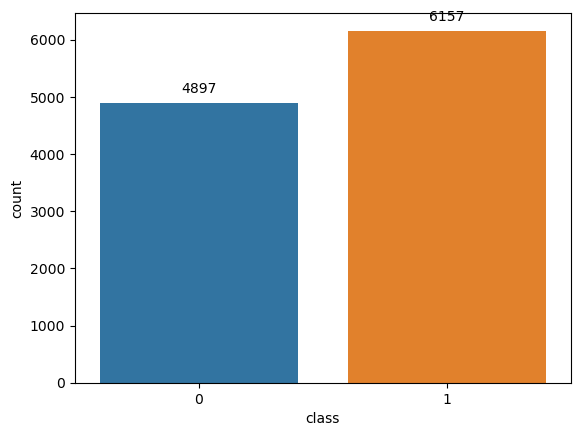

In [7]:
ax=sns.countplot(data=dataframe,x='class')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()
# Data is balanced 

In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11054 entries, 0 to 11053
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   UsingIP              11054 non-null  int64
 1   LongURL              11054 non-null  int64
 2   ShortURL             11054 non-null  int64
 3   Symbol@              11054 non-null  int64
 4   Redirecting//        11054 non-null  int64
 5   PrefixSuffix-        11054 non-null  int64
 6   SubDomains           11054 non-null  int64
 7   HTTPS                11054 non-null  int64
 8   DomainRegLen         11054 non-null  int64
 9   Favicon              11054 non-null  int64
 10  NonStdPort           11054 non-null  int64
 11  HTTPSDomainURL       11054 non-null  int64
 12  RequestURL           11054 non-null  int64
 13  AnchorURL            11054 non-null  int64
 14  LinksInScriptTags    11054 non-null  int64
 15  ServerFormHandler    11054 non-null  int64
 16  InfoEmail            1

In [9]:
dataframe.shape

(11054, 31)

In [10]:
# Check for non-numeric data
numeric_df = dataframe.apply(pd.to_numeric, errors='coerce')
is_all_numeric = not numeric_df.isnull().values.any()
print(is_all_numeric)

True


In [11]:
# Check for null values
dataframe.isnull().sum()

UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

# Data Exploration for Phishing Dataset


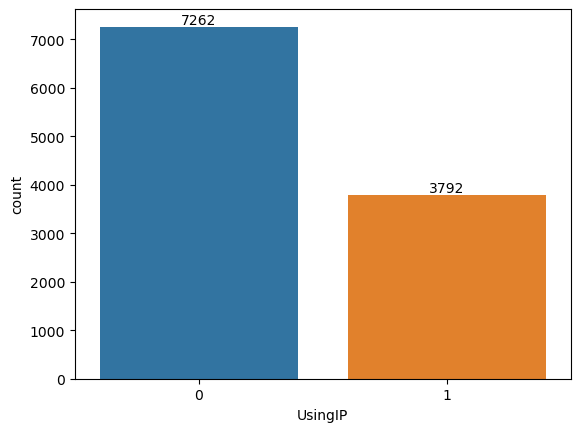

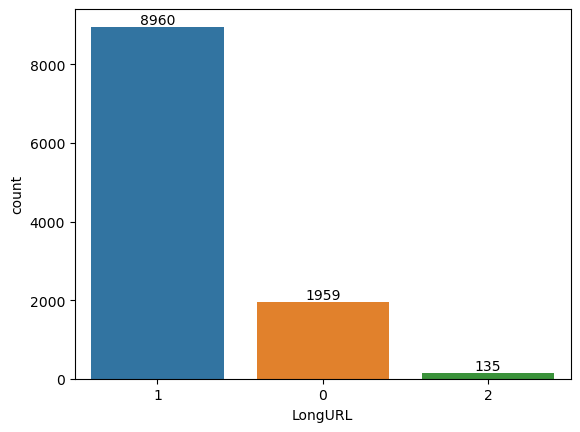

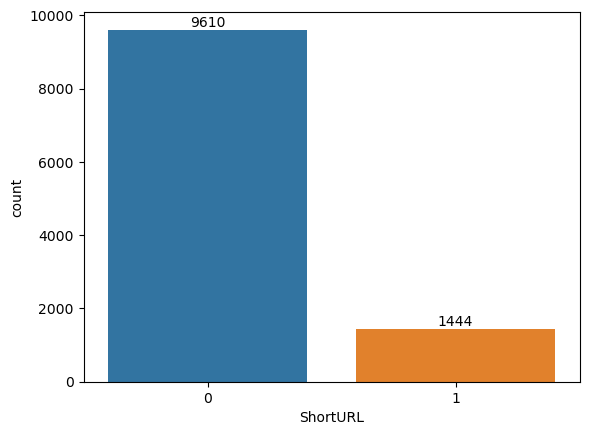

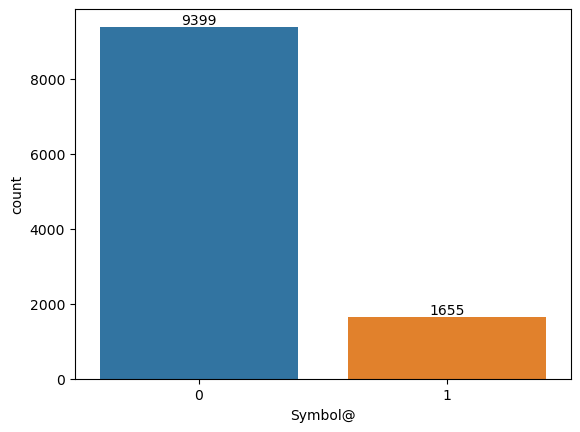

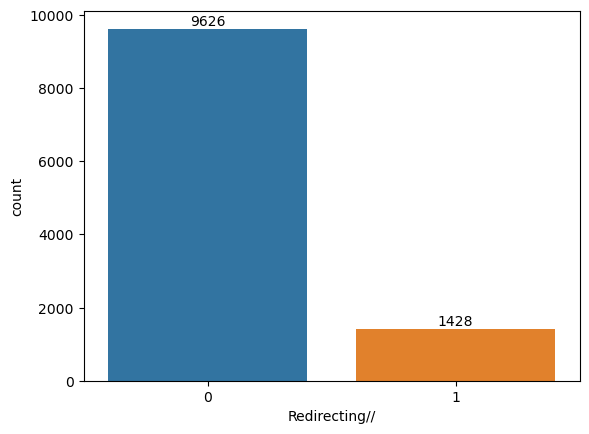

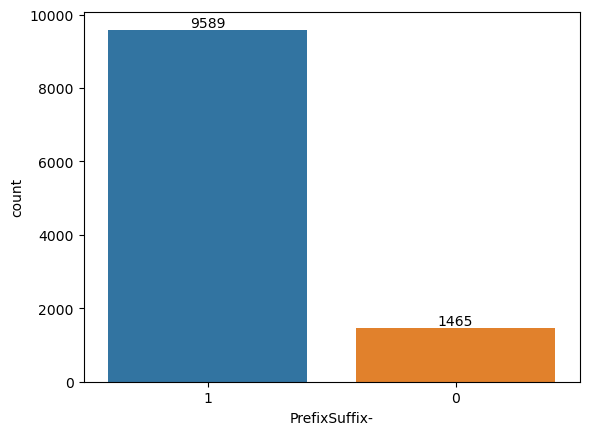

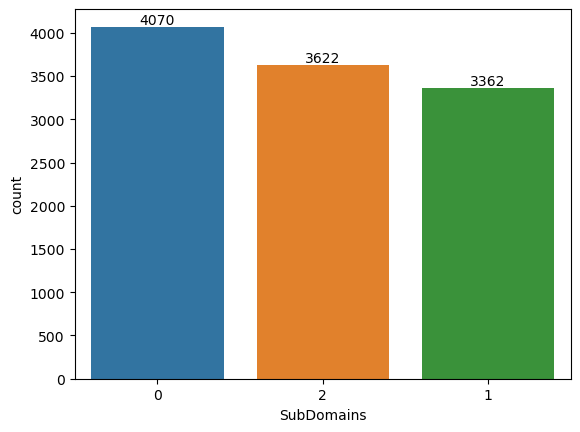

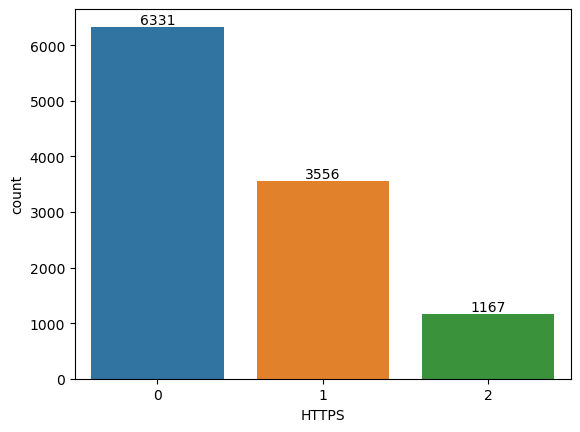

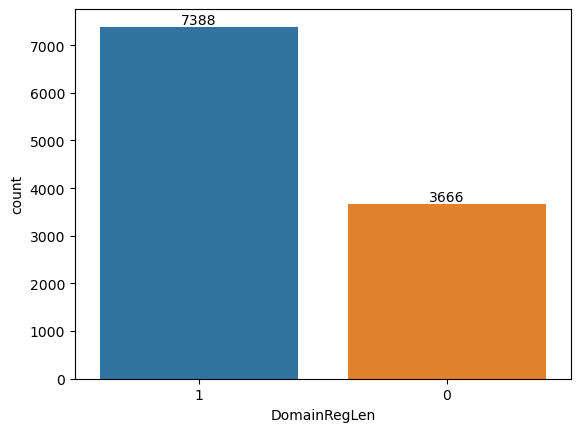

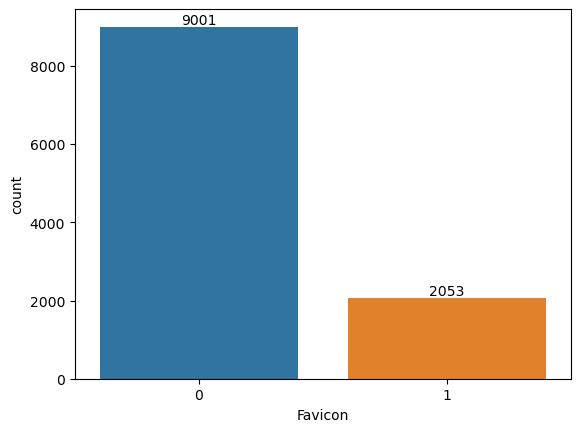

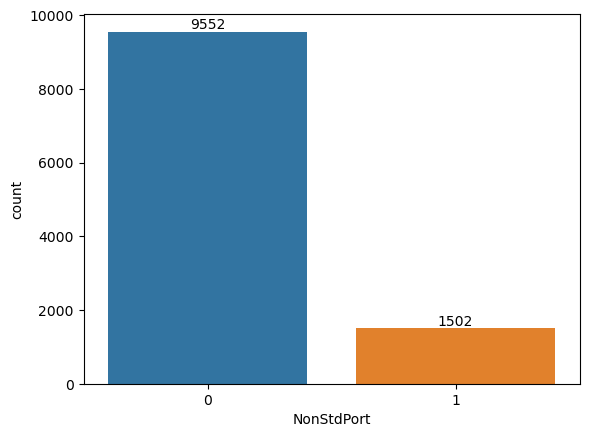

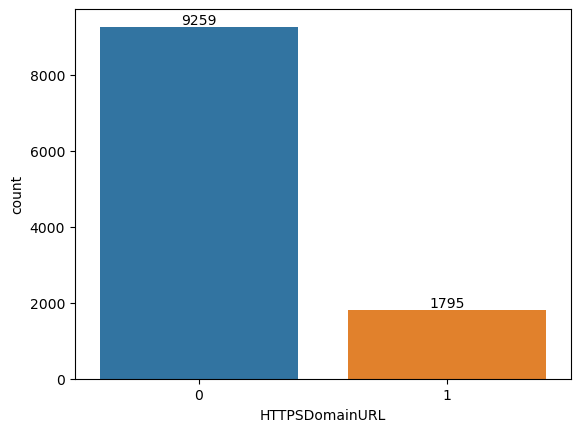

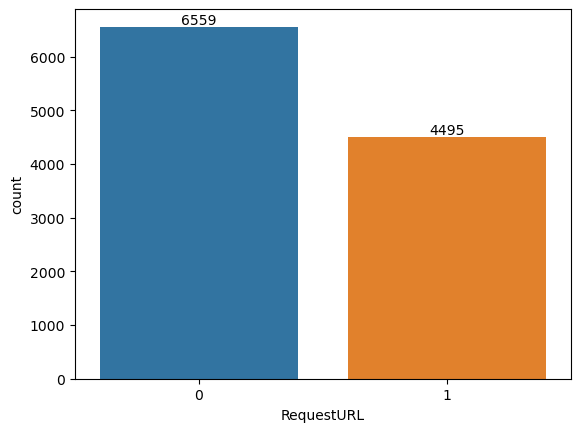

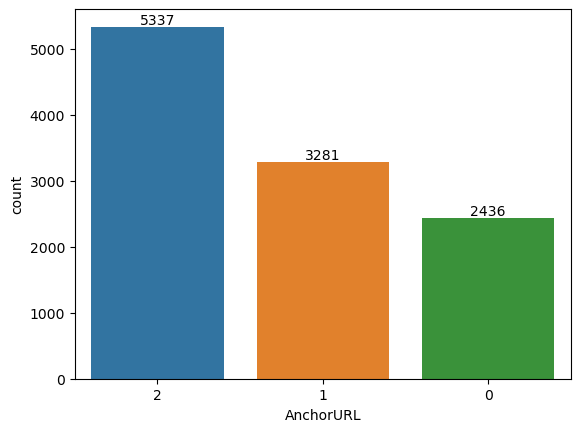

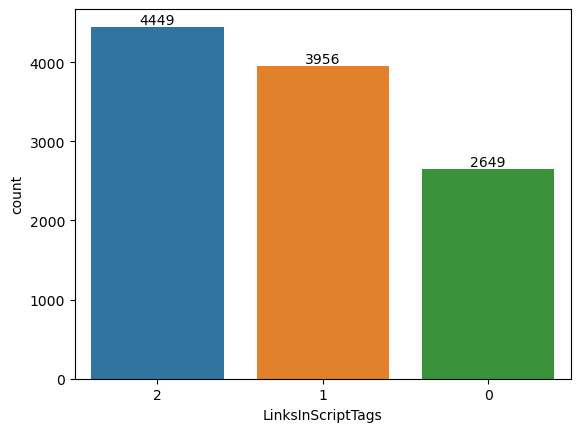

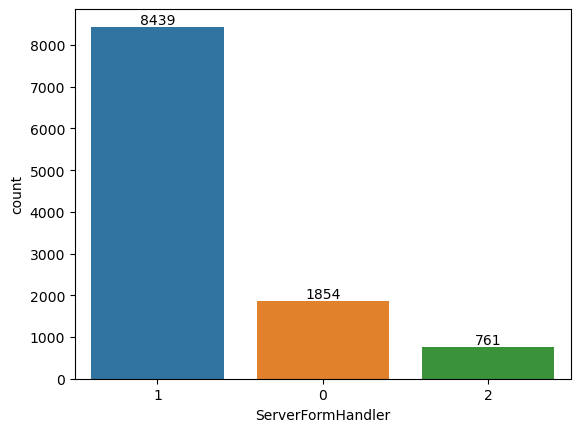

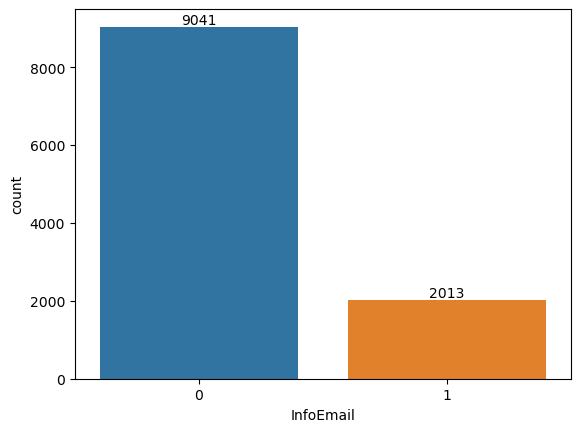

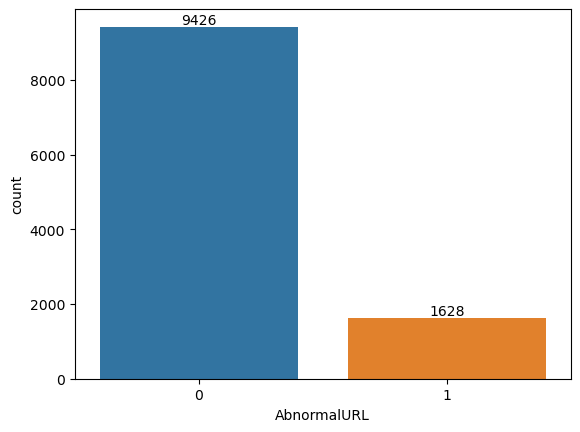

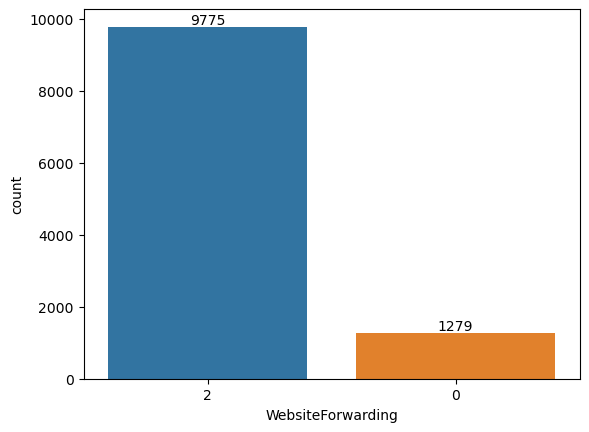

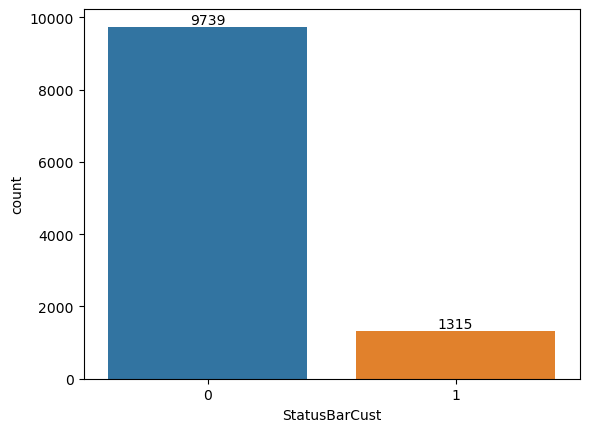

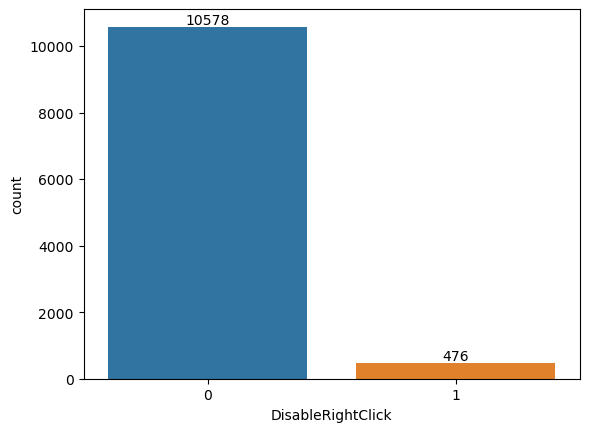

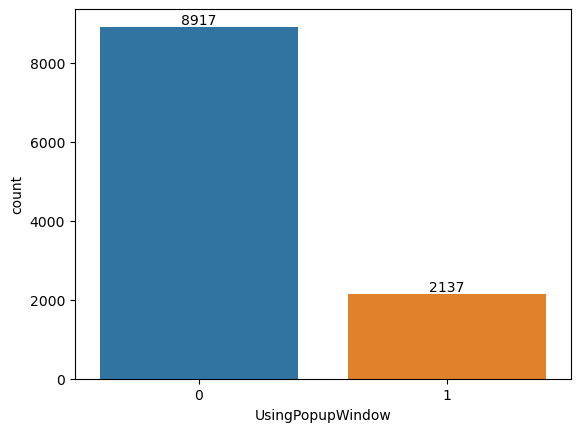

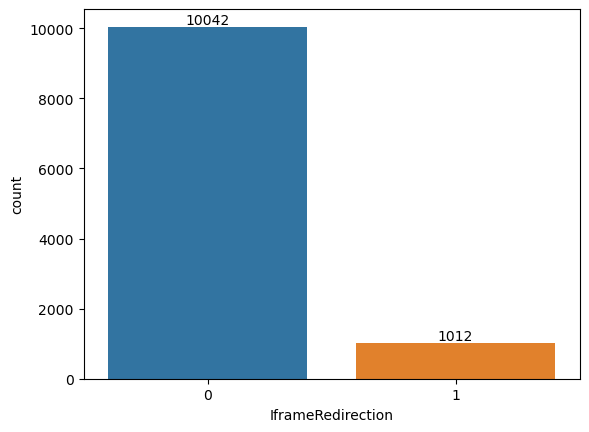

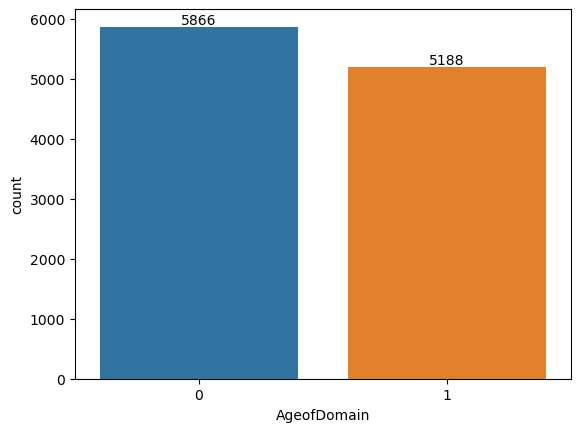

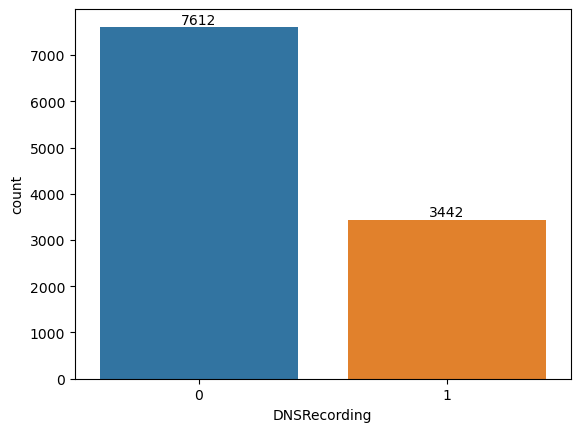

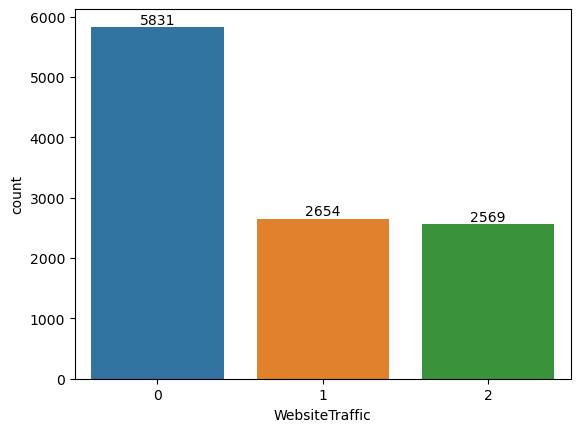

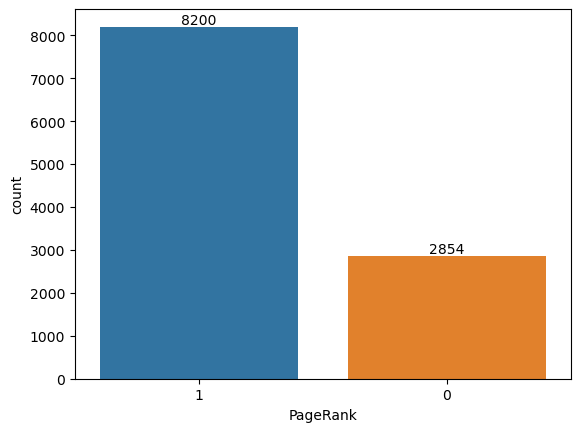

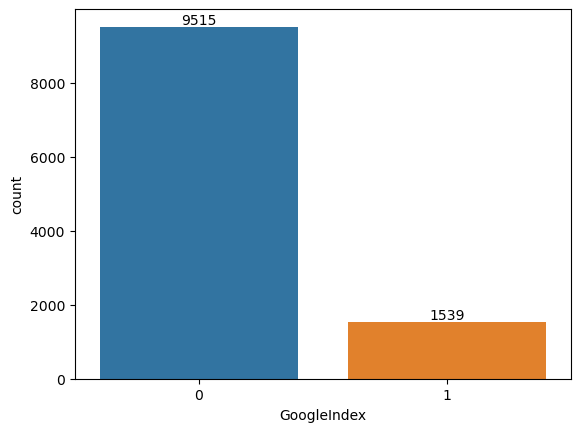

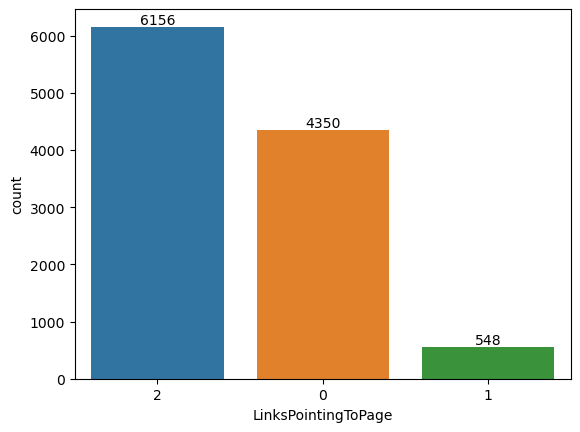

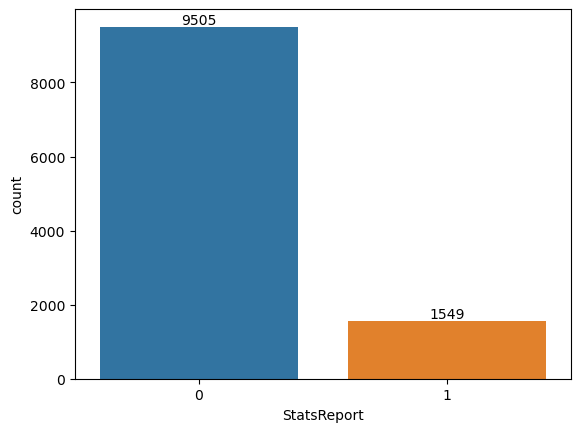

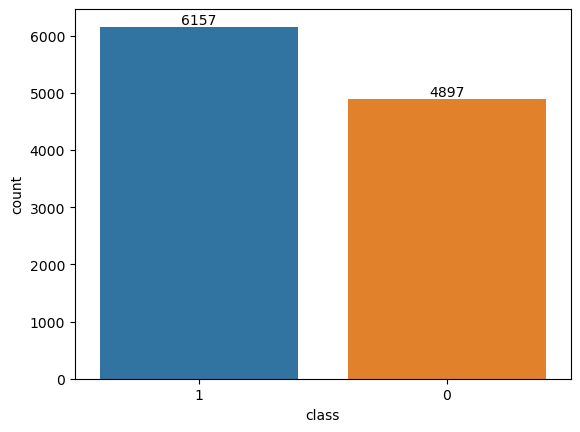

In [12]:
#Loop and Plot all the variables in a Bar Graph
column_names = dataframe.columns

for col in column_names:
    ax = sns.countplot(x=dataframe[col],  order=dataframe[col].value_counts(ascending=False).index)
    abs_values = dataframe[col].value_counts(ascending=False).values
    ax.bar_label(container=ax.containers[0], labels=abs_values)
    plt.show()

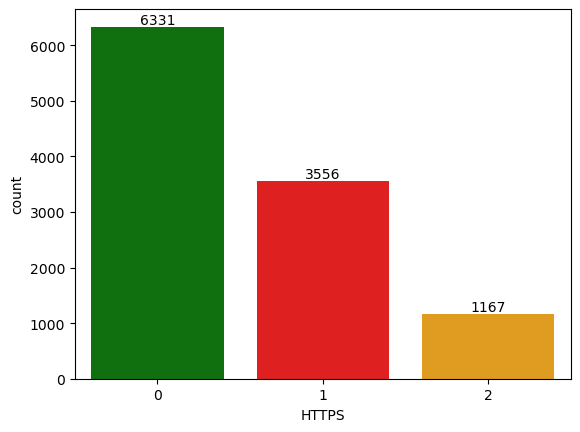

In [13]:
#After looking through all the graphs, we decided to select HTTPS
column_name = "HTTPS"

# Define custom colors, green=legitimate, red=phishing, orange=suspicious
custom_palette = {0: 'green', 1: 'red', 2: 'orange'}

# Create the count plot with custom colors
ax = sns.countplot(x=dataframe[column_name], order=dataframe[column_name].value_counts(ascending=False).index, palette=custom_palette)
abs_values = dataframe[column_name].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show()

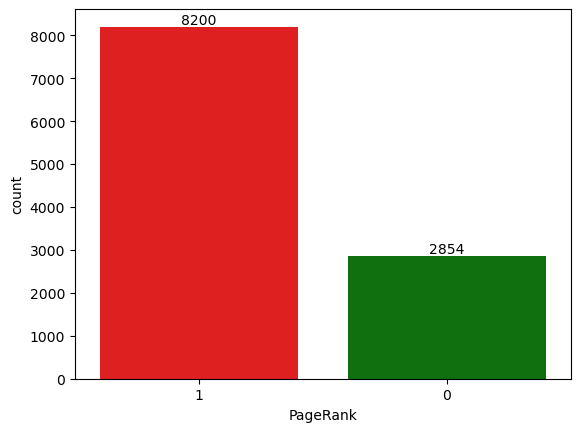

In [14]:
#We also selected PageRank to visualise
column_name = "PageRank"

# Define custom colors, green=legitimate, red=phishing
custom_palette = {0: 'green', 1: 'red'}

# Create the count plot with custom colors
ax = sns.countplot(x=dataframe[column_name], order=dataframe[column_name].value_counts(ascending=False).index, palette=custom_palette)
abs_values = dataframe[column_name].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show()

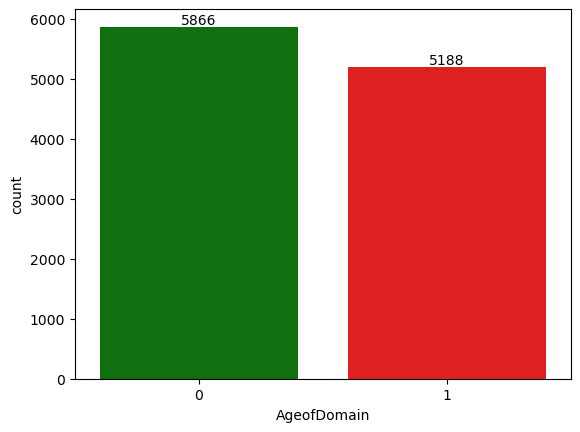

In [15]:
#Age of Domain is chosen since it is not a good indicator - equal probability of phishing and non-phishing
column_name = "AgeofDomain"

# Define custom colors, green=legitimate, red=phishing
custom_palette = {0: 'green', 1: 'red'}

# Create the count plot with custom colors
ax = sns.countplot(x=dataframe[column_name], order=dataframe[column_name].value_counts(ascending=False).index, palette=custom_palette)
abs_values = dataframe[column_name].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show()

array([[<AxesSubplot:title={'center':'UsingIP'}>,
        <AxesSubplot:title={'center':'LongURL'}>,
        <AxesSubplot:title={'center':'ShortURL'}>,
        <AxesSubplot:title={'center':'Symbol@'}>,
        <AxesSubplot:title={'center':'Redirecting//'}>,
        <AxesSubplot:title={'center':'PrefixSuffix-'}>],
       [<AxesSubplot:title={'center':'SubDomains'}>,
        <AxesSubplot:title={'center':'HTTPS'}>,
        <AxesSubplot:title={'center':'DomainRegLen'}>,
        <AxesSubplot:title={'center':'Favicon'}>,
        <AxesSubplot:title={'center':'NonStdPort'}>,
        <AxesSubplot:title={'center':'HTTPSDomainURL'}>],
       [<AxesSubplot:title={'center':'RequestURL'}>,
        <AxesSubplot:title={'center':'AnchorURL'}>,
        <AxesSubplot:title={'center':'LinksInScriptTags'}>,
        <AxesSubplot:title={'center':'ServerFormHandler'}>,
        <AxesSubplot:title={'center':'InfoEmail'}>,
        <AxesSubplot:title={'center':'AbnormalURL'}>],
       [<AxesSubplot:title={'center':

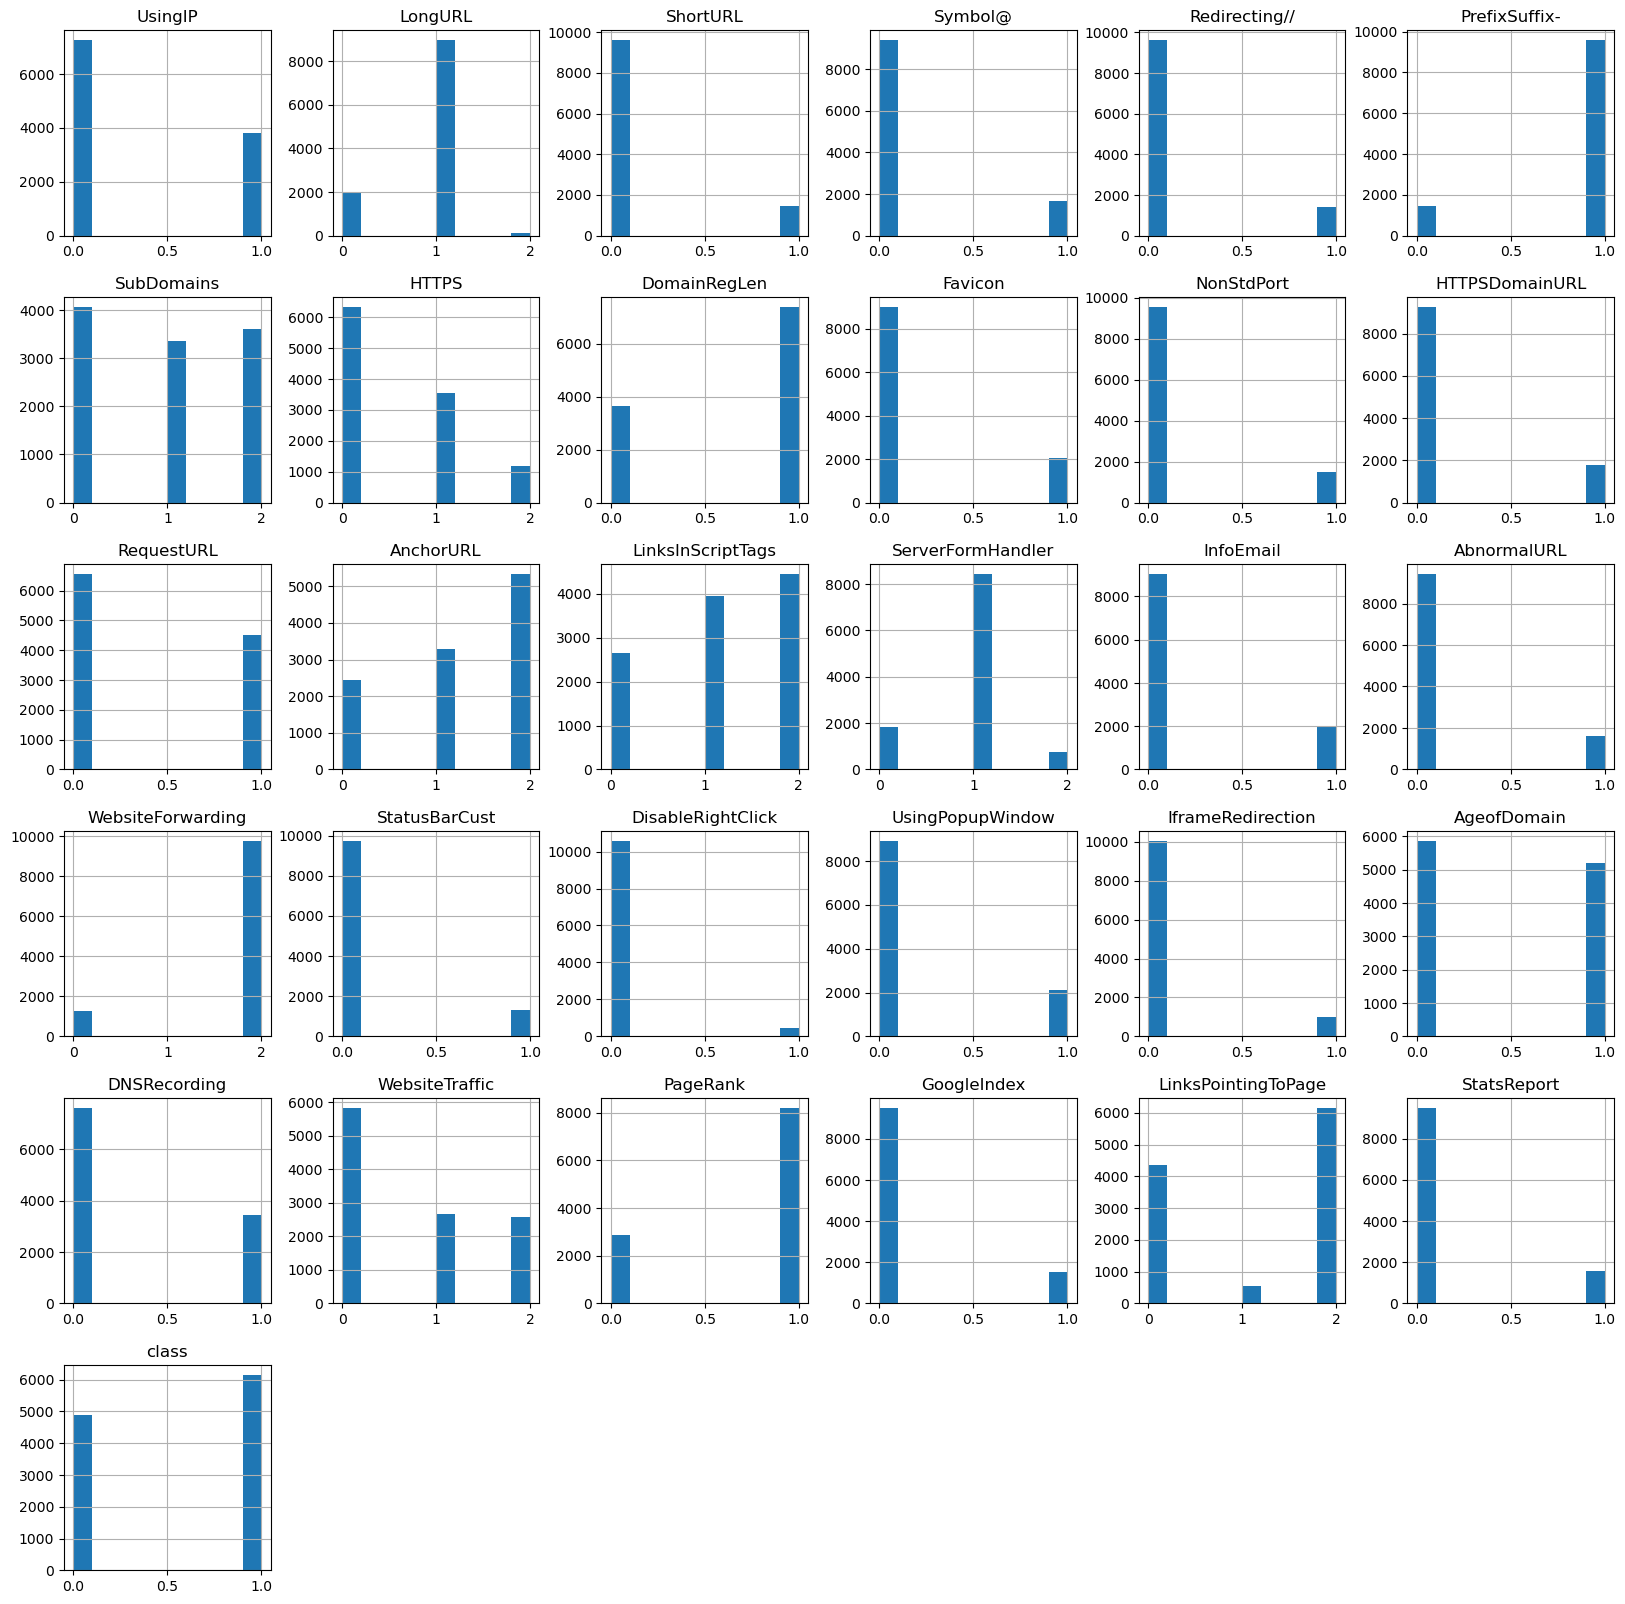

In [16]:
dataframe.hist(figsize=(20,20))

# Analysing Dataset with Models

In [17]:
import numpy as np
import seaborn as sns
import random
import warnings

warnings.filterwarnings("ignore")

## Logistic Regression

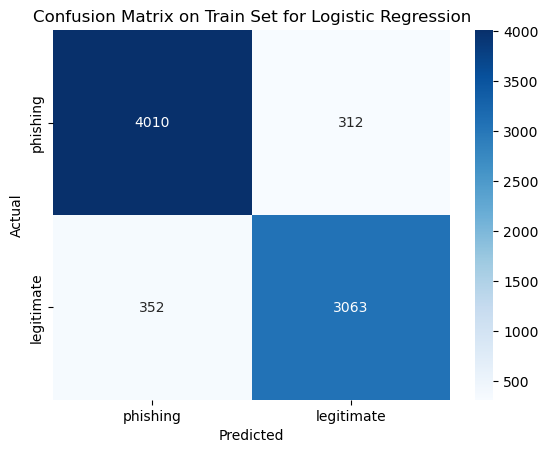

Accuracy: 91.418%


In [18]:
# Train-test split 
X = dataframe.drop(columns="class")
Y = dataframe["class"]

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=2024)

# Model
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(X_train, Y_train)
pred = model.predict(X_train)

# Evaluate train set
from sklearn.metrics import confusion_matrix
Y_train_labels = Y_train.map({1: 'phishing', 0: 'legitimate'})
pred_labels = pd.Series(pred).map({1: 'phishing', 0: 'legitimate'})
labels = Y_train_labels.unique()
cm = confusion_matrix(Y_train_labels, pred_labels, labels=labels)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Train Set for Logistic Regression')
plt.show()

accuracy = (cm[0,0]+cm[1,1])/sum(sum(cm))
print(f"Accuracy: {round(accuracy, 5)*100}%")

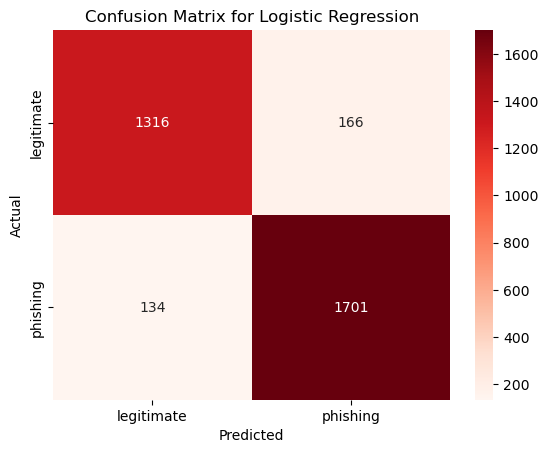

Accuracy: 90.956%


In [19]:
# Evaluate test set
pred = model.predict(X_test)

Y_test_labels = Y_test.map({1: 'phishing', 0: 'legitimate'})
pred_labels = pd.Series(pred).map({1: 'phishing', 0: 'legitimate'})
labels = Y_test_labels.unique()
cm = confusion_matrix(Y_test_labels, pred_labels, labels=labels)

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

accuracy_logregbase = (cm[0,0]+cm[1,1])/sum(sum(cm))
print(f"Accuracy: {round(accuracy_logregbase, 5)*100}%")

### Logistic Regression with Feature Selection

In [20]:
# Creating duplicate df
df2 = dataframe

In [21]:
summary = df2.describe()
summary.transpose()

,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.343043,0.474747,0.0,0.0,0.0,1.0,1.0
LongURL,11054.0,0.834992,0.402766,0.0,1.0,1.0,1.0,2.0
ShortURL,11054.0,0.130631,0.337012,0.0,0.0,0.0,0.0,1.0
Symbol@,11054.0,0.149720,0.356812,0.0,0.0,0.0,0.0,1.0
Redirecting//,11054.0,0.129184,0.335419,0.0,0.0,0.0,0.0,1.0
PrefixSuffix-,11054.0,0.867469,0.339083,0.0,1.0,1.0,1.0,1.0
SubDomains,11054.0,0.959472,0.833233,0.0,0.0,1.0,2.0,2.0
HTTPS,11054.0,0.532839,0.678313,0.0,0.0,0.0,1.0,2.0
DomainRegLen,11054.0,0.668355,0.470825,0.0,0.0,1.0,1.0,1.0
Favicon,11054.0,0.185725,0.388902,0.0,0.0,0.0,0.0,1.0


In [22]:
# Check data types
df2.dtypes

UsingIP                int64
LongURL                int64
ShortURL               int64
Symbol@                int64
Redirecting//          int64
PrefixSuffix-          int64
SubDomains             int64
HTTPS                  int64
DomainRegLen           int64
Favicon                int64
NonStdPort             int64
HTTPSDomainURL         int64
RequestURL             int64
AnchorURL              int64
LinksInScriptTags      int64
ServerFormHandler      int64
InfoEmail              int64
AbnormalURL            int64
WebsiteForwarding      int64
StatusBarCust          int64
DisableRightClick      int64
UsingPopupWindow       int64
IframeRedirection      int64
AgeofDomain            int64
DNSRecording           int64
WebsiteTraffic         int64
PageRank               int64
GoogleIndex            int64
LinksPointingToPage    int64
StatsReport            int64
class                  int64
dtype: object

In [23]:
# Convert all columns to categorical
columns = df2.columns
df2[columns] = df2[columns].astype("category")

In [24]:
# Creating dummy in df2 for categorical data
dummy = pd.get_dummies(df2, drop_first=True)
class_column = pd.DataFrame(df2["class"])
df2 = class_column.merge(dummy, left_index=True, right_index=True)
df2.head()

,class,UsingIP_1,LongURL_1,LongURL_2,ShortURL_1,Symbol@_1,Redirecting//_1,PrefixSuffix-_1,SubDomains_1,SubDomains_2,...,AgeofDomain_1,DNSRecording_1,WebsiteTraffic_1,WebsiteTraffic_2,PageRank_1,GoogleIndex_1,LinksPointingToPage_1,LinksPointingToPage_2,StatsReport_1,class_1
Index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,1,0,1,...,1,1,0,1,1,0,0,0,0,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,1,1,0
2,0,0,0,1,0,0,0,1,1,0,...,1,1,0,0,1,0,1,0,0,0
3,1,0,0,1,1,0,0,1,0,0,...,1,1,0,1,1,0,0,0,0,1
4,1,1,0,1,1,0,1,1,0,0,...,0,0,0,0,1,0,1,0,1,1


In [25]:
# Checking for multicollinearity in df2
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
X = df2.drop(columns="class")
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

# VIF < 5. Hence, no multicollinearity. 

                  feature       VIF
0               UsingIP_1  0.146706
1               LongURL_1  0.000000
2               LongURL_2  1.210791
3              ShortURL_1  0.601170
4               Symbol@_1  0.121251
5         Redirecting//_1  0.574908
6         PrefixSuffix-_1  0.103030
7            SubDomains_1  0.021802
8            SubDomains_2  0.024620
9                 HTTPS_1  0.216512
10                HTTPS_2  0.272519
11         DomainRegLen_1  0.138025
12              Favicon_1  0.032792
13           NonStdPort_1  0.936031
14       HTTPSDomainURL_1  0.006159
15           RequestURL_1  0.088124
16            AnchorURL_1  0.324491
17            AnchorURL_2  0.145038
18    LinksInScriptTags_1  0.077996
19    LinksInScriptTags_2  0.061218
20    ServerFormHandler_1  0.209591
21    ServerFormHandler_2  0.500994
22            InfoEmail_1  0.464330
23          AbnormalURL_1  0.211264
24    WebsiteForwarding_2  0.059073
25        StatusBarCust_1  0.081213
26    DisableRightClick_1  0

In [26]:
# Feature Selection
X = df2.drop(columns="class")
Y = df2["class"]

from sklearn.feature_selection import SelectKBest, f_regression
features = SelectKBest(score_func=f_regression, k=5)
fit = features.fit(X, Y).get_support()
new_features = X.columns[fit]
new_features

Index(['PrefixSuffix-_1', 'HTTPS_1', 'HTTPS_2', 'AnchorURL_1', 'AnchorURL_2'], dtype='object')

In [27]:
df3 = df2.loc[:, ['class','PrefixSuffix-_1', 'HTTPS_1', 'HTTPS_2', 'AnchorURL_1', 'AnchorURL_2']]

In [28]:
# Check imbalance
X = df3.drop(columns="class")
Y = df3["class"]

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=2024)
Y_train.value_counts()

1    4322
0    3415
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

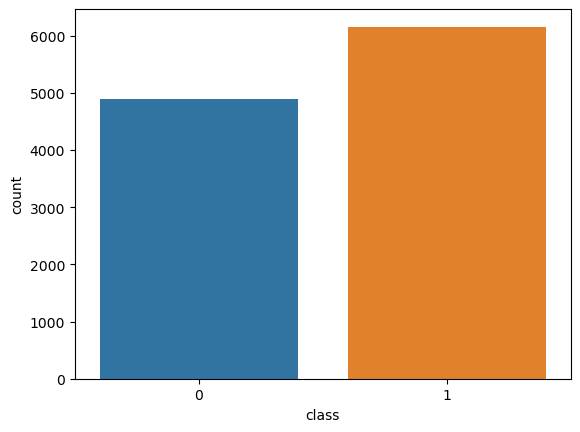

In [29]:
sns.countplot(data=df3,x='class')

# Data is quite balanced 

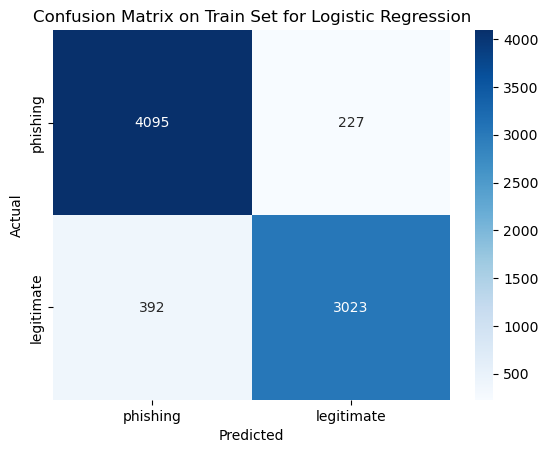

Accuracy: 91.999%


In [30]:
# Train-test split
X = df3.drop(columns="class")
Y = df3["class"]

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=2024)

# Improved model
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(X_train, Y_train)
pred = model.predict(X_train)

# Evaluate train set
from sklearn.metrics import confusion_matrix
Y_train_labels = Y_train.map({1: 'phishing', 0: 'legitimate'})
pred_labels = pd.Series(pred).map({1: 'phishing', 0: 'legitimate'})
labels = Y_train_labels.unique()
cm = confusion_matrix(Y_train_labels, pred_labels, labels=labels)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Train Set for Logistic Regression')
plt.show()

accuracy = (cm[0,0]+cm[1,1])/sum(sum(cm))
print(f"Accuracy: {round(accuracy, 5)*100}%")

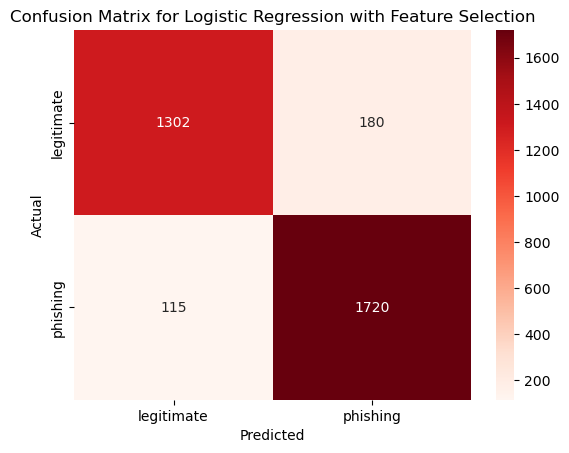

Accuracy: 91.106%


In [31]:
# Evaluate test set
pred = model.predict(X_test)

Y_test_labels = Y_test.map({1: 'phishing', 0: 'legitimate'})
pred_labels = pd.Series(pred).map({1: 'phishing', 0: 'legitimate'})
labels = Y_test_labels.unique()
cm = confusion_matrix(Y_test_labels, pred_labels, labels=labels)

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression with Feature Selection')
plt.show()

accuracy_featureselect = (cm[0,0]+cm[1,1])/sum(sum(cm))
print(f"Accuracy: {round(accuracy_featureselect, 5)*100}%")

In [32]:
#Due to slight imbalance, do Precision & Recall for more accurate evaluation of our models
from sklearn.metrics import confusion_matrix, precision_score, recall_score

precision_LR = round(precision_score(Y_test, pred), 5)*100
recall_LR = round(recall_score(Y_test, pred), 5)*100

print(f"Precision of Logistic Regression model: {precision_LR}%")
print(f"Recall of Logistic Regression model: {recall_LR}%")

Precision of Logistic Regression model: 90.526%
Recall of Logistic Regression model: 93.733%


### Logistic Regression with Backwards Elimination

In [33]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

X = dataframe.drop(columns="class")
y = dataframe["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

model = LogisticRegression()
selector = SequentialFeatureSelector(model, direction='backward', scoring='accuracy')
selector.fit(X_train, y_train)
selected_features_indices = selector.get_support(indices=True)

X_train_selected = X_train.iloc[:, selected_features_indices]
X_test_selected = X_test.iloc[:, selected_features_indices]


X_train_selected_sm = sm.add_constant(X_train_selected)  # Add constant for intercept
model_sm = sm.Logit(y_train, X_train_selected_sm)
result = model_sm.fit()

print(result.summary())

         Current function value: 0.224511
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                 7737
Model:                          Logit   Df Residuals:                     7721
Method:                           MLE   Df Model:                           15
Date:                Sat, 30 Mar 2024   Pseudo R-squ.:                  0.6728
Time:                        00:52:04   Log-Likelihood:                -1737.0
converged:                      False   LL-Null:                       -5309.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  21.4440    114.508      0.187      0.851    -202.988     245.876
UsingIP                -1.5719      0.

C:\Users\nicol\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


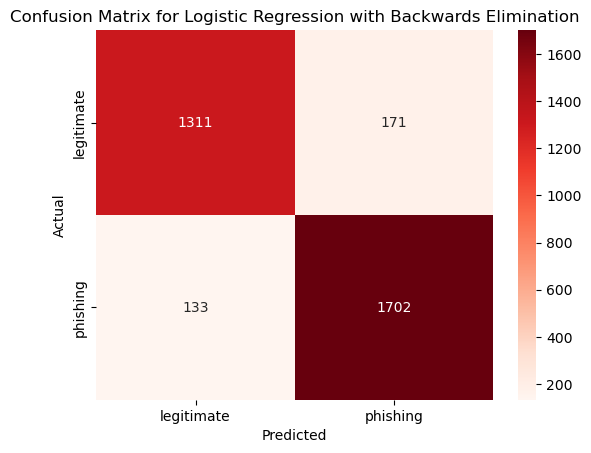

Accuracy: 90.835%


In [34]:
# New model on test set using selected features
cols_with_intercept = sm.add_constant(X_test_selected)  # Add constant for intercept
Y_pred = result.predict(cols_with_intercept)

# Convert probabilities to binary predictions 
# 0=legitimate and 1=phishing
# Threshold is at 0.5
Y_pred_binary = (Y_pred > 0.5).astype(int)

# Evaluating Test Set
Y_test_labels = y_test.map({1: 'phishing', 0: 'legitimate'})
pred_labels = pd.Series(Y_pred_binary).map({1: 'phishing', 0: 'legitimate'})
labels = Y_test_labels.unique()
cm = confusion_matrix(Y_test_labels, pred_labels, labels=labels)

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression with Backwards Elimination')
plt.show()

accuracy_backwards = (cm[0,0]+cm[1,1])/sum(sum(cm))
print(f"Accuracy: {round(accuracy_backwards, 5)*100}%")

- dataframe - original df
- df2 - dummy variables created
- df3 - after feature selection 

## Random Forest

### Random Forest with Train-test Split

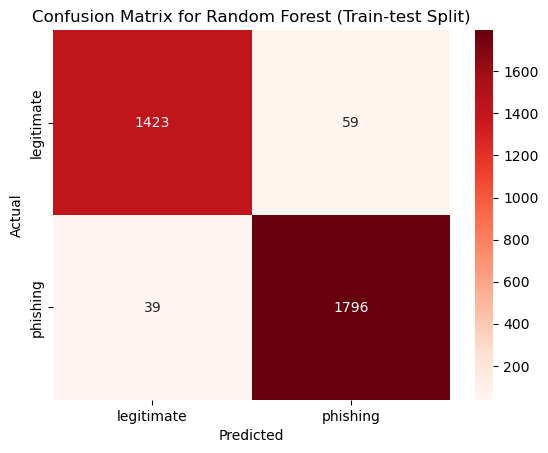

Accuracy: 97.046%


In [35]:
# Train-test split on dataframe
X = dataframe.drop(columns="class")
Y = dataframe["class"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=2024)

from sklearn import ensemble
model = ensemble.RandomForestClassifier(n_estimators=500, random_state=2024)
model.fit(X_train,Y_train)
pred = model.predict(X_test)

# Evaluate Test Set
Y_test_labels = Y_test.map({1: 'phishing', 0: 'legitimate'})
pred_labels = pd.Series(pred).map({1: 'phishing', 0: 'legitimate'})
labels = Y_test_labels.unique()
cm = confusion_matrix(Y_test_labels, pred_labels, labels=labels)

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest (Train-test Split)')
plt.show()

accuracy_rf = (cm[0,0]+cm[1,1])/sum(sum(cm))
print(f"Accuracy: {accuracy_rf*100:.3f}%")

In [36]:
precision_RF = round(precision_score(Y_test, pred), 5)*100
recall_RF = round(recall_score(Y_test, pred), 5)*100

print(f"Precision of Random Forest model: {precision_RF}%")
print(f"Recall of Random Forest model: {recall_RF}%")

Precision of Random Forest model: 96.819%
Recall of Random Forest model: 97.875%


### Random Forest with OOB

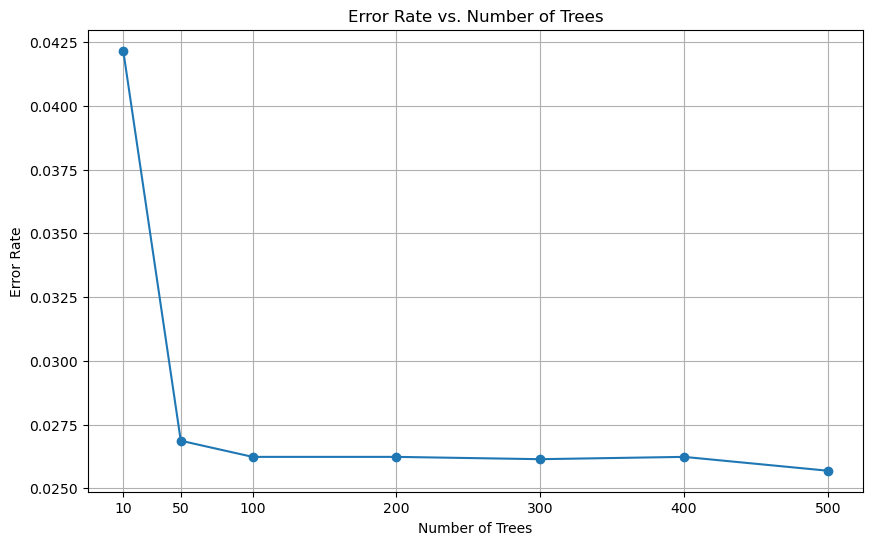

In [37]:
# Plotting OOB error rates

# Initialise lists to store number of trees and corresponding OOB errors
num_trees_list = [10, 50, 100, 200, 300, 400, 500] 
oob_errors = []

# Fit Random Forest models with different number of trees and compute OOB errors
for n_trees in num_trees_list:
    model = ensemble.RandomForestClassifier(n_estimators=n_trees, oob_score=True, random_state=2024)
    model.fit(X, Y)
    oob_error = 1 - model.oob_score_
    oob_errors.append(oob_error)

# Plot the error rate against the number of trees
plt.figure(figsize=(10, 6))
plt.plot(num_trees_list, oob_errors, marker='o')
plt.title('Error Rate vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Error Rate')
plt.xticks(num_trees_list)
plt.grid(True)
plt.show()

OOB Error: 0.025692057173873684


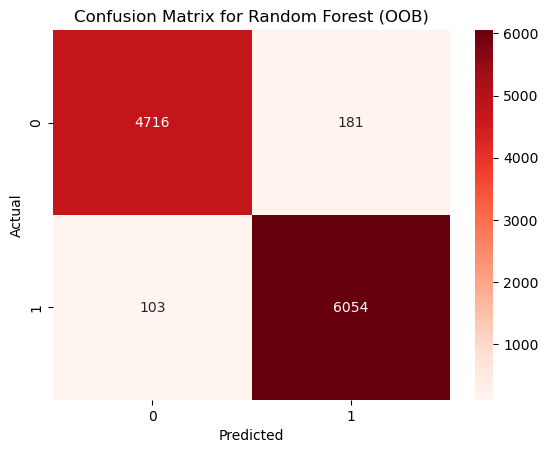

Accuracy: 97.431%


In [38]:
X = dataframe.drop(columns="class")
Y = dataframe["class"]

model = ensemble.RandomForestClassifier(n_estimators=500, oob_score=True, random_state=2024)
model.fit(X,Y)

# Evaluate Model
error_oob = 1 - model.oob_score_
print("OOB Error:", error_oob)

oob_predictions = model.oob_decision_function_.argmax(axis=1)  # Predicted class labels based on OOB samples

# Confusion matrix
cm = confusion_matrix(Y, oob_predictions)

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest (OOB)')
plt.show()

accuracy_oob = (cm[0,0]+cm[1,1])/sum(sum(cm))
print(f"Accuracy: {accuracy_oob*100:.3f}%")

## Neural Network

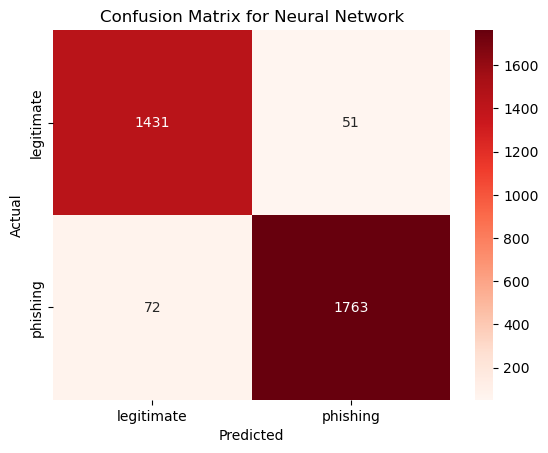

Accuracy: 96.292%


In [39]:
# Train test split
X = dataframe.drop(columns="class")
Y = dataframe["class"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=2024)

# Model
from sklearn import neural_network
model = neural_network.MLPClassifier(random_state=2024)
model.fit(X_train,Y_train)
pred = model.predict(X_test)

# Evaluate Test Set
Y_test_labels = Y_test.map({1: 'phishing', 0: 'legitimate'})
pred_labels = pd.Series(pred).map({1: 'phishing', 0: 'legitimate'})
labels = Y_test_labels.unique()
cm = confusion_matrix(Y_test_labels, pred_labels, labels=labels)

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Neural Network')
plt.show()

accuracy_nn = (cm[0,0]+cm[1,1])/sum(sum(cm))
print(f"Accuracy: {accuracy_nn*100:.3f}%")

In [40]:
# Print the neural network architecture
print("Neural Network Architecture:")
print("Number of Layers:", model.n_layers_)
print("Number of Neurons in each layer:", model.hidden_layer_sizes)
print("Activation function for each layer:", model.activation)

Neural Network Architecture:
Number of Layers: 3
Number of Neurons in each layer: (100,)
Activation function for each layer: relu


In [41]:
precision_NN = round(precision_score(Y_test, pred), 5)*100
recall_NN = round(recall_score(Y_test, pred), 5)*100

print(f"Precision of Neural Network model: {precision_NN:.3f}%")
print(f"Recall of Neural Network model: {recall_NN}%")

Precision of Neural Network model: 97.189%
Recall of Neural Network model: 96.076%


# Summary of Model Accuracies

In [42]:
print("Logistic Regression")
print(f"Accuracy of Base Model: {round(accuracy_logregbase, 5)*100}%")
print(f"Accuracy of Feature Selection Model: {round(accuracy_featureselect, 5)*100}%")
print(f"Accuracy of Backwards Elimination Model: {round(accuracy_backwards, 5)*100}%")
print("Random Forest")
print(f"Accuracy of Train-Test Split Model: {accuracy_rf*100:.3f}%")
print(f"Accuracy of OOB Model: {accuracy_oob*100:.3f}%")
print("Neural Network")
print(f"Accuracy of Neural Network Model: {accuracy_nn*100:.3f}%")

Logistic Regression
Accuracy of Base Model: 90.956%
Accuracy of Feature Selection Model: 91.106%
Accuracy of Backwards Elimination Model: 90.835%
Random Forest
Accuracy of Train-Test Split Model: 97.046%
Accuracy of OOB Model: 97.431%
Neural Network
Accuracy of Neural Network Model: 96.292%


In [43]:
from tabulate import tabulate

# Create a dictionary to store the data
data = {
    'Model': ['Logistic Regression', ' ', ' ',
              'Random Forest', ' ', 'Neural Network'],
    'Accuracy': [
        f"Base Model: {round(accuracy_logregbase, 5)*100:.3f}%",  # Logistic Regression - Base Model
        f"Feature Selection Model: {round(accuracy_featureselect, 5)*100:.3f}%",  # Logistic Regression - Feature Selection
        f"Backwards Elimination Model: {round(accuracy_backwards, 5)*100:.3f}%",  # Logistic Regression - Backwards Elimination
        f"Train-Test Split Model: {accuracy_rf*100:.3f}%",  # Random Forest - Train-Test Split
        f"OOB Model: {accuracy_oob*100:.3f}%",  # Random Forest - OOB
        f"Neural Network Model: {accuracy_nn*100:.3f}%"  # Neural Network
    ]
}

# Create a dataframe from the data dictionary
df = pd.DataFrame(data)

# Print the dataframe in a tabular format using tabulate
print(tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False))


╒═════════════════════╤══════════════════════════════════════╕
│ Model               │ Accuracy                             │
╞═════════════════════╪══════════════════════════════════════╡
│ Logistic Regression │ Base Model: 90.956%                  │
├─────────────────────┼──────────────────────────────────────┤
│                     │ Feature Selection Model: 91.106%     │
├─────────────────────┼──────────────────────────────────────┤
│                     │ Backwards Elimination Model: 90.835% │
├─────────────────────┼──────────────────────────────────────┤
│ Random Forest       │ Train-Test Split Model: 97.046%      │
├─────────────────────┼──────────────────────────────────────┤
│                     │ OOB Model: 97.431%                   │
├─────────────────────┼──────────────────────────────────────┤
│ Neural Network      │ Neural Network Model: 96.292%        │
╘═════════════════════╧══════════════════════════════════════╛


In [44]:
# Sample dataframe
data = {'Model Accuracy': [accuracy_featureselect*100, accuracy_rf*100,accuracy_nn*100],
        'Precision': [precision_LR, precision_RF, precision_NN],
        'Recall': [recall_LR, recall_RF, recall_NN]}
df_summary = pd.DataFrame(data)

df_summary = df_summary.rename(index={0:'Logistic Regression', 1:'Random Forest', 2: 'Neural Network'})
# Directly print the dataframe
print(df_summary)

                     Model Accuracy  Precision  Recall
Logistic Regression       91.106421     90.526  93.733
Random Forest             97.045523     96.819  97.875
Neural Network            96.291830     97.189  96.076
